<a href="https://colab.research.google.com/github/BDouchet/Spotify_dataset/blob/main/genre_classification/Other_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id='16phKfXvRrwGbOJrNKpgbYnBnZG6icXFX'

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('dataset.zip')

with ZipFile('dataset.zip', 'r') as zip:
   zip.extractall()
   print('Done')

df=pd.read_csv('dataset/Spotify_train_dataset.csv')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

data=df.drop(labels=['type','id','uri','track_href','analysis_url','song_name'],axis=1)

genres=['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB', 'Pop', 'Hiphop', 'techhouse', 'techno',
'trance', 'psytrance', 'trap', 'dnb', 'hardstyle']

le = LabelEncoder()
le.classes_=genres
data['genre']=le.transform(data['genre'])

X=data[data.columns[:-1]].to_numpy()
Y=data['genre'].to_numpy()

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=10,test_size=0.2)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

Done
(25382, 13) (25382,) (6346, 13) (6346,)


# LDA & QDA - Linear/Quadratic Discriminant Analysis

The idea being LDA and QDA is to fits a Gaussian Density into each class. LDA has linear decision boundaries while QDA has quadratic. To get the maths behind this process, please see this [notebook](https://github.com/BDouchet/SDATA/blob/main/TP_LDA.ipynb).

[More Info- LDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

[More Info- QDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html)


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import f1_score

In [ ]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train,Y_train)

y_pred = LDA.predict(X_test)
y_pred_train = LDA.predict(X_train)

print(f1_score(Y_train,y_pred_train,average='micro'))
print(f1_score(Y_test,y_pred,average='micro'))

0.527263415018517
0.5228490387645761


In [ ]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train,Y_train)

y_pred = QDA.predict(X_test)
y_pred_train = QDA.predict(X_train)

print(f1_score(Y_train,y_pred_train,average='micro'))
print(f1_score(Y_test,y_pred,average='micro'))

0.6192577417067213
0.6222817522849039


# KNN - K-Nearest Neighbors

KNN is an algorithm where the main idea is to find the most similar vector to an input vector. This similarity is calculated with the Minkowski distance with`p=2`. Thus the idea is to say : the nearest neighbors probably have the same classes than the input.

However, because it is a heavy algorithm in its brute-force way, it is usually applied with more optimized algorithm like [KDTree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree) and [BallTree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree).

[More info](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

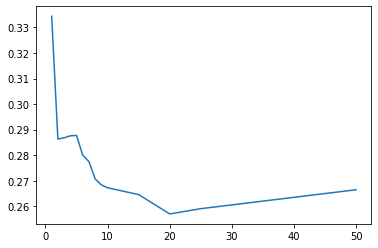

In [ ]:
N=[1,2,3,4,5,6,7,8,9,10,15,20,25,50]
f1s=[]

for n in N:
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,Y_train)
    yhat_test=knn.predict(X_test)
    f1s.append(f1_score(Y_test,yhat_test,average='micro'))

plt.plot(N,f1s)
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)

yhat_test=knn.predict(X_test)
yhat_train=knn.predict(X_train)

print(f1_score(Y_test,yhat_test,average='micro'))
print(f1_score(Y_train,yhat_train,average='micro'))

0.33438386385124486
0.9503979197856749


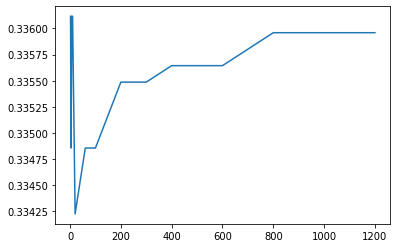

In [ ]:
# Test optimal number for leaf_size

N=[2,4,7,10,20,30,60,100,200,300,400,500,600,800,1200]
f1s=[]

for n in N:
    knn=KNeighborsClassifier(n_neighbors=1,leaf_size=n)
    knn.fit(X_train,Y_train)
    yhat_test=knn.predict(X_test)
    f1s.append(f1_score(Y_test,yhat_test,average='micro'))

plt.plot(N,f1s)
plt.show()

No big changes for this hyperparameter. 
We also tried with other algorithm but the best performances are established with `algorithm=auto`.

# Logistic Regression

[More Info](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score

In [ ]:
parameters=[['newton-cg','l2'],['newton-cg','none'],
            ['sag','l2'],
            ['saga','elasticnet'], ['saga','none'],
            ['lbfgs','l2'],['lbfgs','none']]
fs=[]

In [ ]:
for param in parameters:
    if param[1]=='elasticnet':
        lr =LogisticRegression(solver=param[0],penalty=param[1],l1_ratio=0.5,verbose=0)
    else:
         lr =LogisticRegression(solver=param[0],penalty=param[1],verbose=0)
    lr.fit(X_train,Y_train)
    yhat_test=lr.predict(X_test)
    fs.append(f1_score(Y_test,yhat_test,average='micro'))

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not 

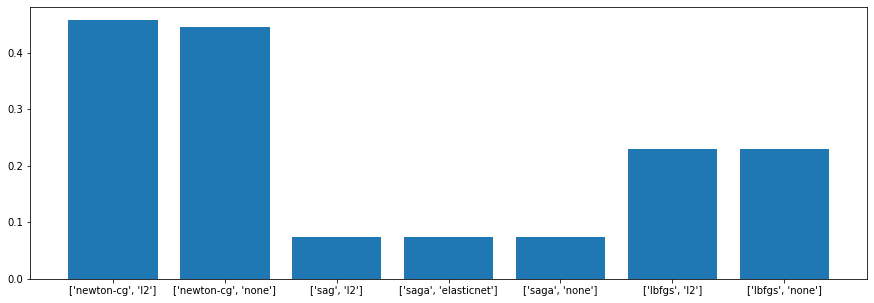

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(np.arange(7),np.array(fs))
plt.xticks(np.arange(7),labels=parameters)
plt.show()

In [ ]:
lr =LogisticRegression(solver='newton-cg')
lr.fit(X_train,Y_train)

yhat_test=lr.predict(X_test)
yhat_train=lr.predict(X_train)

print(f1_score(Y_train,yhat_train,average='micro'))
print(f1_score(Y_test,yhat_test,average='micro'))

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


0.45146166574738006
0.45808383233532934


/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


# SVC - Support Vector Classification

[More info](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [ ]:
clf = SVC(kernel='rbf')
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

f1_score(Y_test,y_pred,average='micro')

0.2589032461393003

## Linear SVC

In [ ]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

f1_score(Y_test,y_pred,average='micro')

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.1670343523479357

# AdaBoost

AdaBoost is an algorithm using weak classifiers. Indeed this classifiers,similar to small decision trees, are called stumps. A stump has a depth equal to 3. AdaBoost create many stumps predicting probabilities. The sum of the small predicted probabilities will give the final probabilities for each class. 

More info on Boosting : Notebook on Gradient Boosting which presents better performances.  

[More Info on AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.metrics import f1_score

In [ ]:
ada = AdaBoostClassifier(learning_rate=0.1,n_estimators=50)
ada.fit(X_train,Y_train)

yhat_test=ada.predict(X_test)
yhat_train=ada.predict(X_train)

print(f1_score(Y_train,yhat_train,average='micro'))
print(f1_score(Y_test,yhat_test,average='micro'))

0.39551650776140573
0.4019855026788528
